In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [18]:
perc_expand_by_epoch = pd.read_csv('../outs/perc_expand_by_epoch_final.csv', index_col=0)
perc_expand_by_epoch_tetra = pd.read_csv('../outs/perc_expand_by_epoch_tetra_final.csv', index_col=0)

In [19]:
# set confidence intervals
# ci_lo = 83.78112; ci_hi = 93.41913; ci_mid = 90.4
# ci_lo = 79.67; ci_hi = 93.42; ci_mid = 91.21
# ci_lo_tetra = 87.58; ci_hi_tetra = 93.42; ci_mid_tetra = 90.44
qtl_ci = pd.read_csv('../outs/qtl_ci.csv', index_col=0)
qtl_ci_tetra = pd.read_csv('../outs/qtl_ci_tetra.csv', index_col=0)
ci_lo = float(qtl_ci['ci_lo']); ci_hi = float(qtl_ci['ci_hi']); ci_mid = float(qtl_ci['pos'])
ci_lo_tetra = float(qtl_ci_tetra['ci_lo']); ci_hi_tetra = float(qtl_ci_tetra['ci_hi']); ci_mid_tetra = float(qtl_ci_tetra['pos'])


In [20]:
# filter and change bp to mb
perc_expand_by_epoch_chr13 = perc_expand_by_epoch[perc_expand_by_epoch['chr']=='chr13']
perc_expand_by_epoch_chr13_pos_MB = perc_expand_by_epoch_chr13['pos']/1000000
perc_expand_by_epoch_chr13.insert(6, 'pos_MB', perc_expand_by_epoch_chr13_pos_MB)

perc_expand_by_epoch_chr13_tetra = perc_expand_by_epoch_tetra[perc_expand_by_epoch_tetra['chr']=='chr13']
perc_expand_by_epoch_chr13_tetra_pos_MB = perc_expand_by_epoch_chr13_tetra['pos']/1000000
perc_expand_by_epoch_chr13_tetra.insert(6, 'pos_MB', perc_expand_by_epoch_chr13_tetra_pos_MB)

In [21]:
perc_expand_by_epoch_chr13_tetra

,epoch_grp,chr,pos,end,LOD,lod_thresh,pos_MB
5214,1,chr13,3428651,3428651,0.202208,3.571771,3.428651
5215,1,chr13,4432426,4432426,0.202208,3.571771,4.432426
5216,1,chr13,6304055,6304055,0.202208,3.571771,6.304055
5217,1,chr13,6703085,6703085,0.144292,3.571771,6.703085
5218,1,chr13,9218071,9218071,0.144229,3.571771,9.218071
...,...,...,...,...,...,...,...
48058,all,chr13,119270436,119270436,0.351648,3.572317,119.270436
48059,all,chr13,119270567,119270567,0.351648,3.572317,119.270567
48060,all,chr13,119390734,119390734,0.344944,3.572317,119.390734
48061,all,chr13,119415045,119415045,0.326112,3.572317,119.415045


In [22]:
# get points to plot to have the boxed square effect; get 3 points to plot from 2 data points
def get_pts(x_data, y_data):
    x_pts = []
    y_pts = []
    for i in range(len(x_data)-1):
        x_pts.append(x_data[i])
        y_pts.append(y_data[i])
        x_pts.append(x_data[i])
        y_pts.append(y_data[i+1])
    x_pts.append(x_data[-1])
    y_pts.append(y_data[-1])
    return x_pts, y_pts


In [23]:
# get traces for all and tetra
x_epoch1_pts, y_epoch1_pts = get_pts(list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='1']['pos_MB']), list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='1']['LOD']))
x_epoch2_pts, y_epoch2_pts = get_pts(list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='2']['pos_MB']), list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='2']['LOD']))
x_epoch3a_pts, y_epoch3a_pts = get_pts(list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='3a']['pos_MB']), list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='3a']['LOD']))
x_epoch3b_pts, y_epoch3b_pts = get_pts(list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='3b']['pos_MB']), list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='3b']['LOD']))
x_epoch4_7_pts, y_epoch4_7_pts = get_pts(list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='4-7']['pos_MB']), list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='4-7']['LOD']))
x_epoch_all_pts, y_epoch_all_pts = get_pts(list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='all']['pos_MB']), list(perc_expand_by_epoch_chr13[perc_expand_by_epoch_chr13['epoch_grp']=='all']['LOD']))

x_tetra_epoch1_pts, y_tetra_epoch1_pts = get_pts(list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='1']['pos_MB']), list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='1']['LOD']))
x_tetra_epoch2_pts, y_tetra_epoch2_pts = get_pts(list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='2']['pos_MB']), list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='2']['LOD']))
x_tetra_epoch3a_pts, y_tetra_epoch3a_pts = get_pts(list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='3a']['pos_MB']), list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='3a']['LOD']))
x_tetra_epoch3b_pts, y_tetra_epoch3b_pts = get_pts(list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='3b']['pos_MB']), list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='3b']['LOD']))
x_tetra_epoch4_7_pts, y_tetra_epoch4_7_pts = get_pts(list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='4-7']['pos_MB']), list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='4-7']['LOD']))
x_tetra_epoch_all_pts, y_tetra_epoch_all_pts = get_pts(list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='all']['pos_MB']), list(perc_expand_by_epoch_chr13_tetra[perc_expand_by_epoch_chr13_tetra['epoch_grp']=='all']['LOD']))



In [24]:
# genes: Ccnh, Rasa1, Edil3, Xrcc4, Tmem167, Atg10, Ssbp2, Msh3, Cmya5, Thbs4, Tent2

gtf_file = pd.read_csv('../data/vep/gencode.vM30.annotation.gtf.gz', skiprows=5, sep='\t', header=None)

In [25]:
gtf_file_chr13 = gtf_file[(gtf_file[0]=='chr13') & (gtf_file[2]=='gene')]
gtf_file_chr13[8] = gtf_file_chr13[8].apply(lambda x: x.split('gene_name "')[1].split('"')[0])


/var/folders/c1/k0129xhx4_bgpnnqt36vbnym0000gn/T/ipykernel_91935/904110354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtf_file_chr13[8] = gtf_file_chr13[8].apply(lambda x: x.split('gene_name "')[1].split('"')[0])


In [26]:
genes = ['Ccnh', 'Rasa1', 'Edil3', 'Xrcc4', 'Tmem167', 'Atg10', 'Ssbp2', 'Msh3', 'Cmya5', 'Thbs4', 'Tent2']
gtf_file_chr13_genes = gtf_file_chr13[gtf_file_chr13[8].isin(genes)]

In [27]:
gtf_file_chr13_genes_startpos_MB = gtf_file_chr13_genes[3]/1000000
gtf_file_chr13_genes.insert(9, 'pos_start_MB', gtf_file_chr13_genes_startpos_MB)
gtf_file_chr13_genes_endpos_MB = gtf_file_chr13_genes[4]/1000000
gtf_file_chr13_genes.insert(10, 'pos_end_MB', gtf_file_chr13_genes_endpos_MB)
gtf_file_chr13_genes

,0,1,2,3,4,5,6,7,8,pos_start_MB,pos_end_MB
1391061,chr13,HAVANA,gene,85337527,85371588,.,+,.,Ccnh,85.337527,85.371588
1391162,chr13,HAVANA,gene,85362899,85437249,.,-,.,Rasa1,85.362899,85.437249
1391389,chr13,HAVANA,gene,88969591,89471342,.,+,.,Edil3,88.969591,89.471342
1391707,chr13,HAVANA,gene,89922146,90237727,.,-,.,Xrcc4,89.922146,90.237727
1391775,chr13,HAVANA,gene,90237242,90292026,.,+,.,Tmem167,90.237242,90.292026
1391944,chr13,HAVANA,gene,91083475,91372087,.,-,.,Atg10,91.083475,91.372087
1392054,chr13,HAVANA,gene,91608402,91851548,.,+,.,Ssbp2,91.608402,91.851548
1392439,chr13,HAVANA,gene,92348380,92491511,.,-,.,Msh3,92.348380,92.491511
1392943,chr13,HAVANA,gene,92888098,92931326,.,-,.,Thbs4,92.888098,92.931326
1393039,chr13,HAVANA,gene,93177221,93281232,.,-,.,Cmya5,93.177221,93.281232


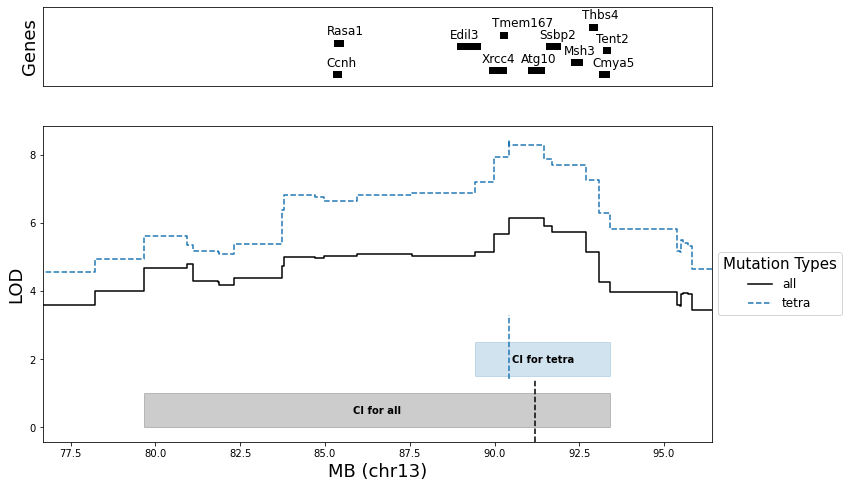

In [28]:
fig, ax = plt.subplots(2, figsize=(12, 8), gridspec_kw={'height_ratios': [1, 4]})

#plot gene locations
ax[0].set_xlim((ci_lo-3, ci_hi+3))
ax[0].set_ylim([-10, 10])
y_locations = [-7, 1, 0, -6, 3, -6, 0, -4, 5, -7, -1]
count = 0

for index, row in gtf_file_chr13_genes.iterrows():
    x_points = [float(row['pos_start_MB']), float(row['pos_end_MB'])]
    ax[0].plot(x_points, [y_locations[count]]*2, linewidth=7, label=row[8], color = 'black')
    ax[0].annotate(row[8], xy=(float(row['pos_start_MB'])-0.3, y_locations[count]+2), fontsize=12)
    count += 1
ax[0].tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax[0].set_ylabel('Genes', fontsize=18)

#plot LOD epoch lines
ax[1].set_xlim((ci_lo-3, ci_hi+3))

ax[1].plot(x_epoch_all_pts, y_epoch_all_pts, label = 'all', color='black')
ax[1].plot(x_tetra_epoch_all_pts, y_tetra_epoch_all_pts, label = 'tetra', linestyle='--', color='tab:blue')

ax[1].axvline(x = ci_mid, ymin = 0, ymax = 0.2, color = 'black', linestyle='--')
ax[1].axvline(x = ci_mid_tetra, ymin = 0.2, ymax = 0.4, color = 'tab:blue', linestyle='--')

rect1 = patches.Rectangle((ci_lo, 0), ci_hi-ci_lo, 1, linewidth=1, edgecolor='black', facecolor='black', alpha=0.2)
ax[1].add_patch(rect1)
rx, ry = rect1.get_xy()
cx = rx + rect1.get_width()/2.0
cy = ry + rect1.get_height()/2.0
ax[1].annotate("CI for all", (cx, cy), color='black', weight='bold', fontsize=10, ha='center', va='center')

rect2 = patches.Rectangle((ci_lo_tetra, 1.5), ci_hi_tetra-ci_lo_tetra, 1, linewidth=1, edgecolor='tab:blue', facecolor='tab:blue', alpha=0.2)
ax[1].add_patch(rect2)
rx, ry = rect2.get_xy()
cx = rx + rect2.get_width()/2.0
cy = ry + rect2.get_height()/2.0
ax[1].annotate("CI for tetra", (cx, cy), color='black', weight='bold', fontsize=10, ha='center', va='center')


ax[1].legend(title='Mutation Types', title_fontsize = 15, fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('MB (chr13)', fontsize=18)
plt.ylabel('LOD', fontsize=18)
plt.savefig('../pdfs/Figure2d.pdf', dpi=300, bbox_inches = "tight")  

Text(0, 0.5, 'LOD')

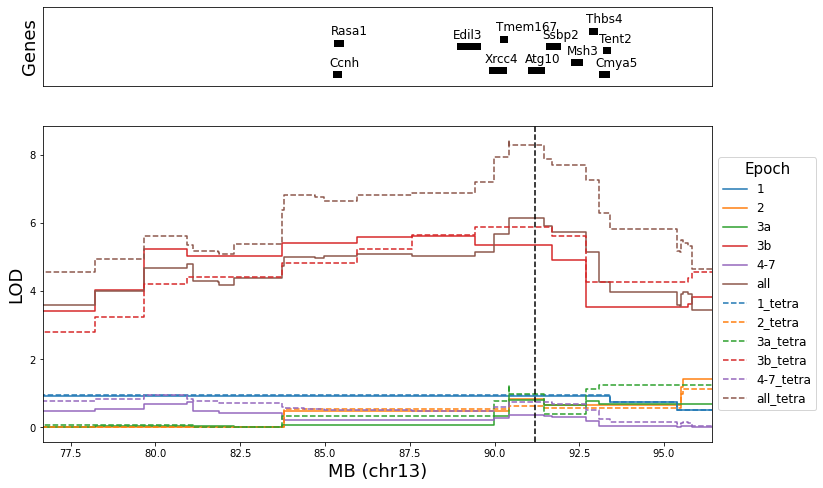

In [29]:
fig, ax = plt.subplots(2, figsize=(12, 8), gridspec_kw={'height_ratios': [1, 4]})
# ci_lo = 83.78112; ci_hi = 93.41913; ci_mid = 90.4


#plot gene locations
ax[0].set_xlim((ci_lo-3, ci_hi+3))
ax[0].set_ylim([-10, 10])
y_locations = [-7, 1, 0, -6, 2, -6, 0, -4, 4, -7, -1]
count = 0
for index, row in gtf_file_chr13_genes.iterrows():
    x_points = [float(row['pos_start_MB']), float(row['pos_end_MB'])]
    ax[0].plot(x_points, [y_locations[count]]*2, linewidth=7, label=row[8], color = 'black')
    ax[0].annotate(row[8], xy=(float(row['pos_start_MB'])-0.2, y_locations[count]+2), fontsize=12)
    count += 1
ax[0].tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax[0].set_ylabel('Genes', fontsize=18)

#plot LOD epoch lines
ax[1].set_xlim((ci_lo-3, ci_hi+3))

ax[1].plot(x_epoch1_pts, y_epoch1_pts, label = '1', color='tab:blue')
ax[1].plot(x_epoch2_pts, y_epoch2_pts, label = '2', color='tab:orange')
ax[1].plot(x_epoch3a_pts, y_epoch3a_pts, label = '3a', color='tab:green')
ax[1].plot(x_epoch3b_pts, y_epoch3b_pts, label = '3b', color='tab:red')
ax[1].plot(x_epoch4_7_pts, y_epoch4_7_pts, label = '4-7', color='tab:purple')
ax[1].plot(x_epoch_all_pts, y_epoch_all_pts, label = 'all', color='tab:brown')

ax[1].plot(x_tetra_epoch1_pts, y_tetra_epoch1_pts, label = '1_tetra', linestyle='--', color='tab:blue')
ax[1].plot(x_tetra_epoch2_pts, y_tetra_epoch2_pts, label = '2_tetra', linestyle='--', color='tab:orange')
ax[1].plot(x_tetra_epoch3a_pts, y_tetra_epoch3a_pts, label = '3a_tetra', linestyle='--', color='tab:green')
ax[1].plot(x_tetra_epoch3b_pts, y_tetra_epoch3b_pts, label = '3b_tetra', linestyle='--', color='tab:red')
ax[1].plot(x_tetra_epoch4_7_pts, y_tetra_epoch4_7_pts, label = '4-7_tetra', linestyle='--', color='tab:purple')
ax[1].plot(x_tetra_epoch_all_pts, y_tetra_epoch_all_pts, label = 'all_tetra', linestyle='--', color='tab:brown')

ax[1].axvline(x = ci_mid, ymin = 0, ymax = 9, color = 'black', linestyle='--')

ax[1].legend(title='Epoch', title_fontsize = 15, fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('MB (chr13)', fontsize=18)
plt.ylabel('LOD', fontsize=18)